In [7]:
import shutil
import random
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt

In [8]:
def copy_images(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for dirpath, dirnames, filenames in os.walk(source_dir):
        for filename in filenames:
            if filename.endswith('.jpg') or filename.endswith('.png'):
                src_path = os.path.join(dirpath, filename)
                target_path = os.path.join(target_dir, filename)
                shutil.copy2(src_path, target_path)

In [9]:
source_dir = 'lines'
target_dir = 'all_images'

copy_images(source_dir, target_dir)

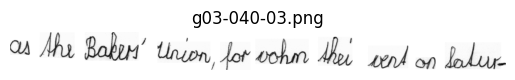

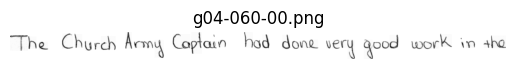

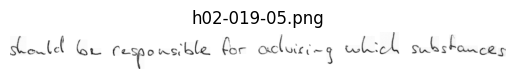

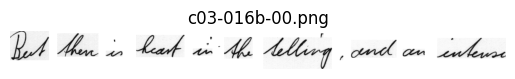

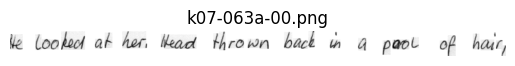

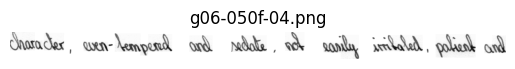

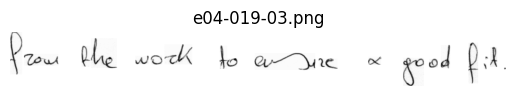

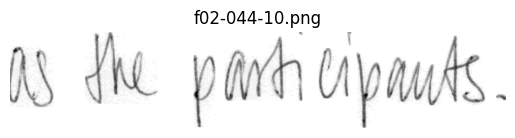

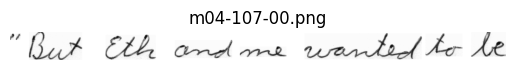

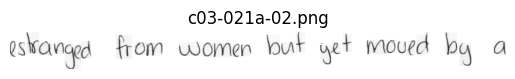

In [2]:
directory = 'all_images'
images = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]

for i in range(10):
    random_image = random.choice(images)

    full_path = os.path.join(directory, random_image)

    img = Image.open(full_path).convert('L')

    plt.imshow(img, cmap='gray')
    plt.title(random_image)
    plt.axis('off')
    plt.show()

* As suspected, we notice very different handwriting, this has main implications:
    * spaces between words are of different sizes
    * letters are not separated the same way, will probably make it difficult for the model to differentiate them
* Less expected: the images are of completely different sizes



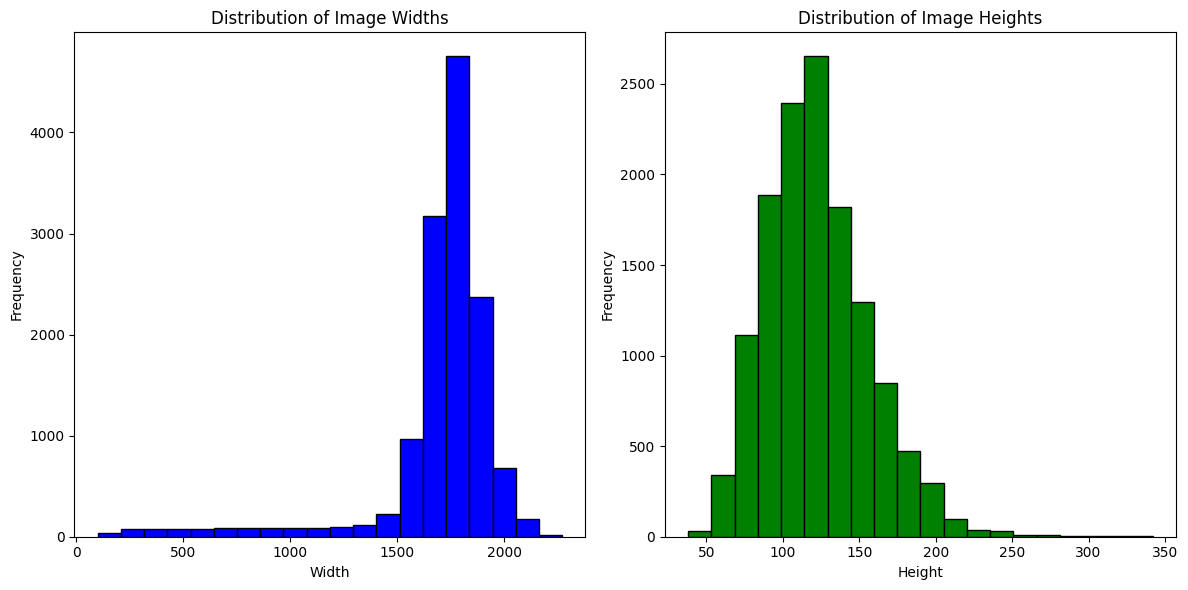

In [3]:
directory = 'all_images'
image_sizes = []

for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = Image.open(os.path.join(directory, filename))
        image_sizes.append(img.size)

widths = [w for w, h in image_sizes]
heights = [h for w, h in image_sizes]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


As we can see, the widths distribution is very tailed to the left: a lot of images have different small widths, but most of the images have similar widths.
About the heigths, the distribution is skewed and we can see that a lot of images have very different heights.
We can already conclude that a rizing of the images will be necessary in the preprocessing phase.
Indeed, our model will only be able to perform its tasks on images of the same dimension.



In [4]:
def spaces(file):
    """
    takes a file containing images, computes the average width (in pixels) of spaces between words for every images
    :param file: a folder containing the images
    :return: a numpy array containing the average space width for every sample
    """
    image = cv2.imread(file, 0)
    _, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    word_coordinates = [cv2.boundingRect(contour) for contour in contours]
    word_coordinates.sort(key=lambda x: x[0])
    spaces = [(word_coordinates[i][0] + word_coordinates[i][2], word_coordinates[i+1][0]) for i in range(len(word_coordinates) - 1)]
    threshold = 25
    filtered_spaces = [space for space in spaces if space[1] - space[0] > threshold]
    return np.mean(filtered_spaces)


/home/jonathan/anaconda3/envs/Homework/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jonathan/anaconda3/envs/Homework/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


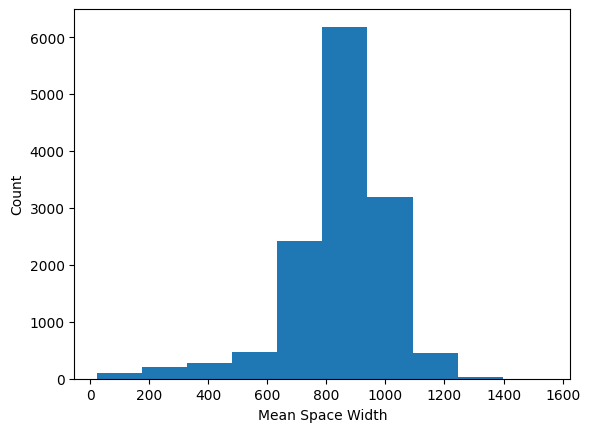

In [10]:
import os
mean_spaces = []
directory = 'all_images'
# Loop through all images in the directory
for filename in os.listdir(directory):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # add more conditions if there are other image formats
        mean_space = spaces(os.path.join(directory, filename))
        mean_spaces.append(mean_space)

# Calculate and print the distribution of mean spaces
plt.hist(mean_spaces, bins=10)
plt.xlabel('Mean Space Width')
plt.ylabel('Count')
plt.show()

We can see that the spaces width in every sample is almost normally distributed

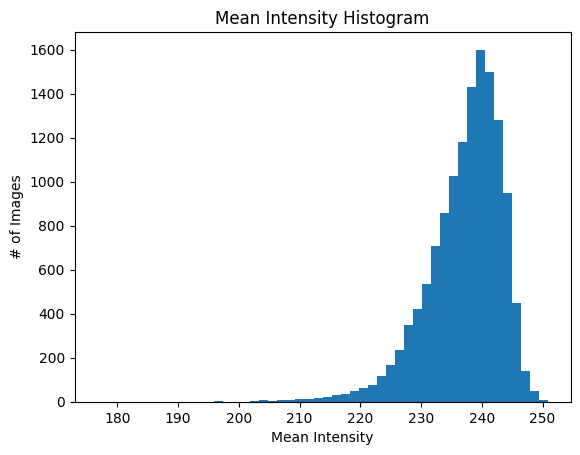

In [9]:

def plot_grayscale_histogram(image_path):
    # Load the image
    image = cv2.imread(image_path, 0) # 0 flag reads image as grayscale

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the mean pixel intensity
    mean_intensity = np.mean(image)

    return histogram, mean_intensity

# Specify the directory
directory = "all_images"

# Create a list to hold the mean intensities of all images
mean_intensities = []

# Loop through all images in the directory
for filename in os.listdir(directory):
    if filename.endswith(".png") or filename.endswith(".jpg"):  # add more conditions if there are other image formats
        image_path = os.path.join(directory, filename)
        histogram, mean_intensity = plot_grayscale_histogram(image_path)
        mean_intensities.append(mean_intensity)

# Create a figure and set its title
plt.figure()
plt.title("Mean Intensity Histogram")
plt.xlabel("Mean Intensity")
plt.ylabel("# of Images")

# Plot the histogram of mean intensities
plt.hist(mean_intensities, bins=50)
plt.show()


TODO:
* check size of words dist